![](https://cl.ly/112M3Y3y2J2k/download/Image%202018-03-28%20at%207.15.49%20AM.png)

I'm [Jason](https://twitter.com/jtoy) and we will be teaching computers how to touch using reinforcement learning with coach and sensenet 
Download Notebook:
https:///github.com/jtoy/sensenet-coach/mster/ai-devbootcamp.ipynb

In [1]:
#: imports, nothing to see here
import matplotlib
import matplotlib.pyplot as plt
import random
import sensenet
import numpy as np
from IPython.display import Image, YouTubeVideo
%matplotlib inline
states_colors = matplotlib.colors.ListedColormap(
    ['#9A9A9A', '#D886BA', '#4D314A', '#6E9183'])

random.seed(1)

# Discovering Reinforcement Learning Without a Math Degree

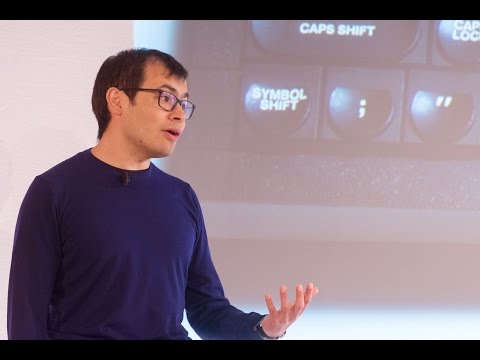

In [2]:
YouTubeVideo("rbsqaJwpu6A")

*A Theory of Everything* was the title of a talk given by Demis Hassabis, neuroscientist and co-founder of DeepMind. DeepMind is an Artificial Intelligence think tank, which has been acquired by Google in 2014.
Hassabis explained that there were only two scientific fields he felt drawn to. The first one is physics obviously dealing with the most fundamental questions one could imagine. Most questions physics is concerned with, like the origin of the universe or the nature of time seem to be way more far reaching than the fugacious existence of the human race or even all biological life altogether.
So why neuroscience? At first glance neuroscience seems to be tied to biological life and everything neuroscience deals with seems to be so short-lived compared to the universal questions of physics.

Demis Hassabis stated that everything we perceive or reason about is tied to our mind and every question we ask or answer couldn't exist without our mind.

So the understanding of the nature of intelligence or maybe even being able to create intelligence is essential for understanding of basically everything else.

To some the impact the coming advances in AI will have on our everyday life, will be even bigger than the changes caused by the ubiquity of computers arisen in the last century. 

Understanding the basics of AI or reinforcement learning could also be about preserving sovereignty and autonomy in a world shaped more and more by the rise of AI technologies.

To me it's fascinating that the principles behind dazzling results like DeepMind's [Human-level control through Deep Reinforcement Learning](https://deepmind.com/research/dqn/) aren't that so much different from the agent traversing through the small grid shaped world of 4x12 squares built in the rest of this notebook.

And it's even more exciting that even the most recent results of a 500 million dollar think tank like DeepMind can be implemented and reconstructed by everyone around the world willing to invest a little time.
I think this is unique to the field of AI right know. It would be unthinkable that anyone could reproduce the recent results in chemistry or experimental physics on her own at home.

## RL in a nutshell

So the basic loop of every agent environment interaction is:

```
while episode is non terminal: 
       agent chooses action
       environment changes state
       agent observes new state and receives reward for new state
       REPEAT
       
```

The goal of RL is to find the sequence of action which maximizes the expected return over time.

Coach is a framework helping to test state of the art RL algorithms in python


But of course the agent doesn't know any of this at all yet.


# Vision vs Touch
Deep Learning has made a lot of progress in recent years, especially in computer vision thanks to  advancements like GPUs, convolutional neural networks and [ImageNet](http://image-net.org). Vision is critical to our daily lives, without it we couldn't do things like driving cars, readings books, playing sports and crossing the street, so its not surprising that the majority of machine learning algorithms are focused on vision. Ever since I read Helen Keller's [autobiography](http://www.gutenberg.org/ebooks/2397), I've had a fascination with touch. Hellen Keller at the age of 18 months old became blind and death, so her conscious life never had vision. Yet she ended up becoming a fully productive member of society, went to college, wrote many books, and was an activists. She explained how her world was lived through her sense of touch.  Think about that, she bootstrapped her whole intelligence through touch.  Is it possible for us to understand how the fundamental algorithms of touch works and is it possible to implement these algorithms into a computer?  Not every animal on earth has vision, but every living animal has some form of touch.  So why the heavy focus  on vision?  Vision is a "wide bandwidth" system , you get lots of information through vision and from far away, while most of the other senses like taste and touch are local and can only sense in the immediate proximity. Touch is uniquely different from the other senses in that it is not experienced from one specific body part like the eyes for vision, the ears for sound, the nose for olfactory, but instead sensed throughout the whole body via its skin. The skin acts not only as an interface between the internal world of the organism and the external world, but as a shell to keep dangerous things out such as radiation and microbes. If there is a [single learning algorithm for intelligence](https://www.quora.com/How-plausible-is-the-theory-that-human-intelligence-stems-from-a-single-algorithm), then the algorithm must work with the touch system as well.  Most of our vision algorithms are static, there is not much dynamic movement involved. There are additions to CNNs, such as [attention mechanisms](http://www.wildml.com/2016/01/attention-and-memory-in-deep-learning-and-nlp/) and [RNNs](https://en.wikipedia.org/wiki/Recurrent_neural_network) that add dynamic behaviour, but they are not a core necessity of CNNs.   Touch as an algorithm has some fundamental differences from our current vision algorithms. Touching to recognize objects must happen over time and movement, for example eith touch object recognition, your finger must slide over the surface of a cup to recognize it, your finger can't just rest on the edge of a cup and know it is a cup. Touch is an active algorithm. The movement chosen is going to directly effect the future sensory input to the finger, so the system must know ahead of time the directions it wants to move in . This combination of the sensory and motor nervous system working together forms what is called the [sensory motor system](https://en.wikipedia.org/wiki/Sensory-motor_coupling) in neuroscience terms.  [Reinforce learning (RL)](https://en.wikipedia.org/wiki/Reinforcement_learning) viewed through the lense of neuroscience could be seen as a crude version of a sensory motor system. The agent is moving in its environment and it only has access to its observation data which is typically vision data to make its choice on where to move next. There is an interaction happening between the sensory input ( the input features)  and the motor system (the action taken) in order to for an agent to accomplish its goal. It is this interaction that I am interested in studying and researching. Even though the touch sense is all over the body and skin, we want to focus on a specific area. The human hand , and by extension, the human fingers are one of the most important parts of are bodies as it allows us to manipulate tools, hold loved ones, type on our computers, and many other things.  The human finger tips are represented in our brains in large regions compared to other parts of the body and senses. The finger tips contain thousands of receptors per centimeter for measuring edges, points, low frequency vibrations, high frequency vibrations,  and stretching. For the types of experiments I have been imagining, I want to test agents that have human like hands and fingers.![](https://cl.ly/1M3225050N2N/hands.png)

# SenseNet
So I wanted to easily do touch and sensory motor experiments with computers. To this, I would need to simulate the contact of objects along with their different properties, in other words I would need to work with a physics engine.  Looking around I found lots of different physics engine with different characteristics. I eventually found [pybullet](http://pybullet.org), an awesome open source physics engine used in games, movies, and machine learning! Pybullet can simulate rigid bodies, soft bodies and collision detections, all in python. I wanted to test out different configurations of touch sensors and  body types for that, I decided to write a python library called [SenseNet](https://github.com/jtoy/sensenet). I ended up starting off with 3 different body types, a humanoid hand called the [MPL](http://www.jhuapl.edu/prosthetics/scientists/mpl.asp), a touch wand, and  a single finger joint. For each of the body types, I made a patch of crude Merkel cell skin sensors that is able to detect points and edges of shapes. I then wrote a reinforcement API that I heavily borrowed from [gym](https://github.com/openai/gym) to allow agents to interact with these environments, so you can literally take any gym or RL code and run it with little to no modifications with SenseNet.

# SenseNet dataset
![](https://cl.ly/1C2q1G0p1Q3q/Image%202018-03-28%20at%207.37.43%20AM.png)I created thousands of different types of shapes on 10+ classes using CAD software: gears, vases, wrenches, axes, legos, buttons, rockets, mallets, and trombones.  You can download the dataset [here](https://sensenet.nyc3.digitaloceanspaces.com/datasets/touchnet_v2.tar.bz2).

A good way to understand how environment and agent interact is to write a simple agent which just chooses actions at random.
Even though the agent does not learn anything at all, the interface to the environment will be the same for the Q-learning agent following next.

The agent needs only 2 methods. One chooses and executes an action in the environment, the other one learns from the reward following this action and the resulting new state.
Of course the learning method of the random agent doesn't do anything at all.

In [6]:
class RandomAgent:
    """Just choosing actions at random. Learns nothing.

    We write this for the purpose of understanding the interface between
    agent and domain we later use for the real RL-agent.

    """

    def __init__(self):
        self.reward_sum = 0
        pass

    def act(self, state, valid_actions):
        """Take state and valid actions for that state. Return  action."""
        action = random.choice(valid_actions)
        return action

    def learn(self, state, action, newstate, reward):
        """Never learns anything."""
        self.reward_sum += reward
        pass

Now this random agent can be used inside of SenseNet. But it won't learn anything. We could start writing out own reinforcement learning algorithm, but before we do that, why won't we try seeing how state of teh art RL algorithms would perform on learning to touch using Intel Coach

In [6]:
import sensenet
from sensenet.envs.handroid.hand_env import HandEnv

class ASenseNetEnv:
    """Just choosing actions at random. Learns nothing.

    We write this for the purpose of understanding the interface between
    agent and domain we later use for the real RL-agent.

    """

    def __init__(self):
        #bootstrap your env, typically load the touch apparatus here
        self.reward_sum = 0

    def _step(self,action):
        #Run one timestep of the environment's dynamics. When end of episode is reached, you are responsible for calling `reset()`to reset this environment's state.
        #Accepts an action and returns a tuple (observation, reward, done, info).
        #Args: action (object): an action provided by the environment
        #Returns: observation (object): agent's observation of the current environment
        #reward (float) : amount of reward returned after previous action
        #done(boolean): whether the episode has ended, in which case further step() calls will return undefined results
        #info (dict): contains auxiliary diagnostic information (helpful for debugging, and sometimes learning)
        action = random.choice(valid_actions)
        return action,observation,reward,done



## Crafting reward functions
So the reward function in reinforcement learning is often where the most time and effort goes into. Using the wrong reward function can send your model in the wrong direcion, have unexpected results, or potentially be a shortcut to your goal. Often times, if you are not careful, you could * write a new reinforcement learning algorithm


## Challenge
So we've done an intro to reinforcement learning, SenseNet, and Coach and now we want to present a challenge:
Create a system with SenseNet and Coach that can train an agent to touch as much surface area of an object that is randomly presented. So if your agent does well at touching trombones, but bad at touching legos, that probably won't win the challenge. The winner of the challenge must be able to touch as much surface area of the objects as possible, touching the same points over and over doesn't count.
There are 3 main avenues to try:
* train an agent with Coach using one of their reinforcement learning algorithms
* modify or create a new reward function
* write a new reinforcement learning algorithm


In [11]:
#challenge commands:
#its best to use full paths everywhere
#to train a model
TOUCH_DATA=/home/u12190/sensenet-coach/touchnet_v2 python coach.py -p TouchWand_DQN -e experiment1
#to load model for evaluation on devcloud
echo 'source activate coach; xvfb-run -a -s "-screen 0 1400x900x24 +extension RANDR" TOUCH_DATA=/path/to/data/ python /home/u5569/sensenet-coach-install/coach.py -p TouchWand_DQN -s 120 -e exp_name' | qsub -l nodes=1:ppn=1
#after running a bunch of experiments, you want to view dashboard, requires xwindows
python dashboard.py

In [ ]:
# understanding the qsub command
# We use the qsub command on devcloud to submit jobs to the cluster
echo "ls" | qsub 
qsub -l nodes=1:ppn=1 is for 1 slot on  c009-n050






